In [5]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt

In [35]:
#Load the dataset
data_path=r"C:\Users\bibib\OneDrive\Documents\Desktop\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"

In [36]:
categories=os.listdir(data_path)

In [37]:
labels=[i for i in range(len(categories))]

In [38]:
label_dict=dict(zip(categories,labels))

In [39]:
print(categories)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [40]:
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [41]:
print(label_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Blueberry___healthy': 3, 'Cherry_(including_sour)___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Grape___Black_rot': 6, 'Grape___Esca_(Black_Measles)': 7, 'Grape___healthy': 8, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 9, 'Orange___Haunglongbing_(Citrus_greening)': 10, 'Pepper,_bell___Bacterial_spot': 11, 'Pepper,_bell___healthy': 12, 'Potato___Early_blight': 13, 'Potato___healthy': 14, 'Potato___Late_blight': 15, 'Strawberry___healthy': 16, 'Strawberry___Leaf_scorch': 17, 'Tomato___Bacterial_spot': 18, 'Tomato___Early_blight': 19, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 20}


In [42]:
image_size=100
data=[]
target=[]

for category in categories:
        folder_path=os.path.join(data_path,category)
        image_names=os.listdir(folder_path)
        for image_name in image_names:
            image_path=os.path.join(folder_path,image_name)
            img=cv2.imread(image_path)
            try:
                grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                resize=cv2.resize(grey,(image_size,image_size))
                data.append(resize)
                target.append(label_dict[category])
            except:
                print("Exception",e)

In [43]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],image_size,image_size,1))
target=np.array(target)

In [44]:
new_target=to_categorical(target)

In [45]:
np.save('data.npy', data)

In [46]:
np.save('target.npy', target)

In [47]:
model=Sequential()

#create a convolutional layer
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))#Here 200 convolutional layer
model.add(Activation('relu'))#relu is the activation function
model.add(MaxPooling2D(pool_size=(2,2)))#2x2 maxpooling layer
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 50 neurons
model.add(Dense(21,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\bibib\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
from sklearn.model_selection import train_test_split
#data preperation
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [49]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [50]:
history=model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/5
880/880 ━━━━━━━━━━━━━━━━━━━━ 2200s 2s/step - accuracy: 0.3270 - loss: 2.1591 - val_accuracy: 0.6855 - val_loss: 0.9581
Epoch 2/5
880/880 ━━━━━━━━━━━━━━━━━━━━ 940s 1s/step - accuracy: 0.7304 - loss: 0.8183 - val_accuracy: 0.7487 - val_loss: 0.7384
Epoch 3/5
880/880 ━━━━━━━━━━━━━━━━━━━━ 942s 1s/step - accuracy: 0.8331 - loss: 0.5114 - val_accuracy: 0.8048 - val_loss: 0.5796
Epoch 4/5
880/880 ━━━━━━━━━━━━━━━━━━━━ 937s 1s/step - accuracy: 0.8777 - loss: 0.3567 - val_accuracy: 0.8399 - val_loss: 0.4765
Epoch 5/5
880/880 ━━━━━━━━━━━━━━━━━━━━ 928s 1s/step - accuracy: 0.9087 - loss: 0.2611 - val_accuracy: 0.8336 - val_loss: 0.5227


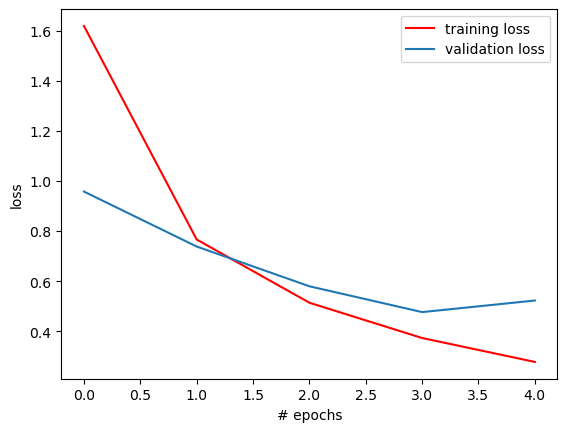

In [51]:

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


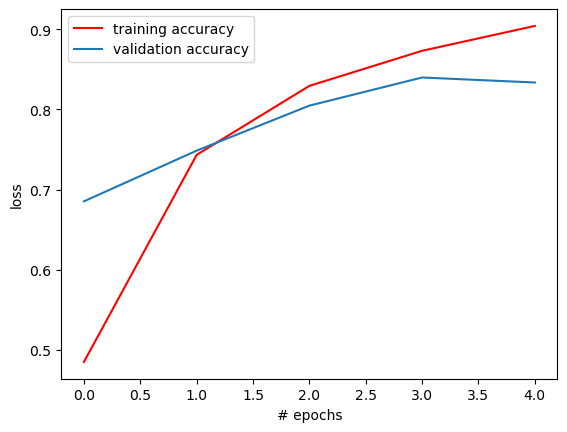

In [52]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model=load_model("model-003.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
[[2.3857584e-02 1.4072732e-02 1.2294030e-01 3.8559610e-04 1.6262065e-01
  3.3581708e-02 6.2001351e-04 3.9272722e-06 2.5932855e-05 3.3218583e-01
  1.5451191e-01 3.1679157e-02 1.6076656e-02 1.6159157e-03 4.2163408e-03
  5.4523457e-02 4.4769851e-05 4.2988750e-06 5.2319327e-04 4.4025145e-02
  2.4848897e-03]]
9


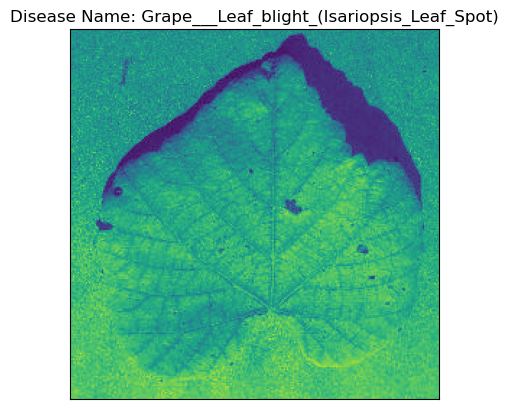

In [21]:
import cv2
import tensorflow as tf
class_name=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
image_path = r"C:\Users\bibib\OneDrive\Documents\Desktop\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Grape___Leaf_blight_(Isariopsis_Leaf_Spot)\00a962ad-573b-44b1-97ae-912a6bd6e0b0___FAM_L.Blight 1431.JPG"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
image = cv2.resize(img, (100, 100))
input_arr = np.array([image]) / 255  # Normalize
input_arr = np.reshape(input_arr, (input_arr.shape[0], 100, 100, 1))  # Add channel dimension
predictions = model.predict(input_arr)
print(predictions)
result_index = np.argmax(predictions) #Return index of max element
print(result_index)
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [22]:
import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image, ImageTk
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("model-003.keras")

# Class names
class_name = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Blueberry___healthy',
              'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Grape___Black_rot',
              'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
              'Orange___Haunglongbing_(Citrus_greening)', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
              'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Strawberry___healthy',
              'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
              'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

# Initialize Tkinter window
root = tk.Tk()
root.title("Plant Disease Classification")
root.geometry("500x600")


# Load the background image
bg_image = Image.open(r"C:\Users\bibib\Downloads\th.jpeg")  # Replace with your image path
bg_image = bg_image.resize((800, 600))  # Resize to fit window size
bg_photo = ImageTk.PhotoImage(bg_image)

# Create a Label to hold the background image
bg_label = tk.Label(root, image=bg_photo)
bg_label.place(x=0, y=0, relwidth=1, relheight=1)  # Cover full window



# Function to load and preprocess image
def upload_image():
    global img_path, img_display
    img_path = filedialog.askopenfilename()
    if not img_path:
        return
    img = Image.open(img_path)
    img = img.resize((250, 250))
    img_display = ImageTk.PhotoImage(img)
    image_label.config(image=img_display)
    image_label.image = img_display

# Function to make predictions
def predict_disease():
    if not img_path:
        result_label.config(text="Please upload an image first!")
        return
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100)) / 255.0
    img = np.reshape(img, (1, 100, 100, 1))
    predictions = model.predict(img)
    result_index = np.argmax(predictions)
    prediction = class_name[result_index]
    result_label.config(text=f"Prediction: {prediction}")

# UI Elements
upload_btn = tk.Button(root, text="Upload Image", command=upload_image, font=("Arial", 12))
upload_btn.pack(pady=10)

image_label = tk.Label(root)
image_label.pack(pady=10)

predict_btn = tk.Button(root, text="Predict", command=predict_disease, font=("Arial", 12))
predict_btn.pack(pady=10)

result_label = tk.Label(root, text="Prediction: ", font=("Arial", 14, "bold"))
result_label.pack(pady=10)

# Run Tkinter main loop
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
